# MSA 2024 Phase 2 - Part 1 

## W stores sales forcasting and analysis.

The following is part one of my work for submission of MSA 2024.

Mostafa Raziebrahimsaraei

### Importing the datasets and important packages

In [1]:
# First, we import important packages:

import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta



In [2]:
# Next, we read the datasets:

sales = pd.read_csv("sales.csv")

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

## 1. Find all variables and understand them

### General look at the data-sets

sales data-set

In [3]:
# A quick look at each datasets. First, sales data_set.

display(sales.head())
print(f"The shape of the Sales data-set is {sales.shape},")
print(f"the number of missing data is given by \n{sales.isnull().sum()},") 
print(f"the types of the data are given by\n{sales.dtypes}")

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

The shape of the Sales data-set is (421570, 5),
the number of missing data is given by 
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64,
the types of the data are given by
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


Stores data_set

In [4]:
# Second, we have a look at stores data_set.

display(stores.head())
print(f"The shape of the Sales data-set is {stores.shape},")
print(f"the number of missing data is given by \n{stores.isnull().sum()},") 
print(f"the types of the data are given by\n{stores.dtypes}")



Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

The shape of the Sales data-set is (45, 3),
the number of missing data is given by 
Store    0
Type     0
Size     0
dtype: int64,
the types of the data are given by
Store     int64
Type     object
Size      int64
dtype: object


In [5]:
# Are there any store of type C?

my_value = "C"
results = stores.loc[stores["Type"] == my_value]

results


Store Type   Size
29     30    C  42988
36     37    C  39910
37     38    C  39690
41     42    C  39690
42     43    C  41062
43     44    C  39910

Features data_set

In [6]:
# Next, we have a look at features data_set.

display(features.head())
print(f"The shape of the Sales data-set is {features.shape},")
print(f"the number of missing data is given by \n{features.isnull().sum()},") 
print(f"the types of the data are given by\n{features.dtypes}")



Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

The shape of the Sales data-set is (8190, 12),
the number of missing data is given by 
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64,
the types of the data are given by
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


## Descriptions of our variables
We will have a quick look at each variable:


Stores:

* There are 45 of stores;
* according to each store, there are types of associated to;
* further, we have several departments attached to each store;
* each store has a size associated to it.

Dates:
* We have weekly information time series, for about two and half years.

Temperature and Fuel Price and Unemployment:
* We are give (probably) average weekly information of fuel price and temperature and unemployment.

CPI:
* This is consumer pricing index. This is measure of the average change overtime in the prices paid by urban costumers.

MarkDowns, 1-5:
* These are, seemingly, reduction of prices from the original prices.

Weekly_Sales:
* Given each store, we have the weekly sales associated to each. These are the values that we want to predict.

Is_Holida:
* Apparantly, this shows wether given a week, we have a holiday in that week.

     

We will create a dataset containing all the features. This is the data set that we analyze.

## 2. Clean data

### Constructing a merged data_frame
Before continuing we merge our datasets inton a single dataframe named sales_df. In addition to given features, we will add new columns for each week, month and year based on the variable Date. 

In [7]:
# Merging features and store.
features_store = features.merge(stores, on="Store", how='inner')

features_store["Date"] = pd.to_datetime(features_store["Date"])
sales["Date"] = pd.to_datetime(sales["Date"])

# Adding some basic datetime features
features_store['Week'] = features_store['Date'].dt.isocalendar().week #cant figure out week calculation, dt.week is depreciated
features_store['Month'] = features_store['Date'].dt.month
features_store['Year'] = features_store['Date'].dt.year

# The final data set
sales_df = sales.merge(features_store, on = ["Store", "Date", "IsHoliday"]).sort_values(by=["Store","Dept","Date"])

display(sales_df.head(), sales_df.shape)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0        1     1 2010-02-05      24924.50      False        42.31       2.572   
73       1     1 2010-02-12      46039.49       True        38.51       2.548   
145      1     1 2010-02-19      41595.55      False        39.93       2.514   
218      1     1 2010-02-26      19403.54      False        46.63       2.561   
290      1     1 2010-03-05      21827.90      False        46.50       2.625   

     MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0          NaN        NaN        NaN        NaN        NaN  211.096358   
73         NaN        NaN        NaN        NaN        NaN  211.242170   
145        NaN        NaN        NaN        NaN        NaN  211.289143   
218        NaN        NaN        NaN        NaN        NaN  211.319643   
290        NaN        NaN        NaN        NaN        NaN  211.350143   

     Unemployment Type    Size  Week  Month  Year  
0           8.106    A  151315     5      2  2010  
73          8.106    A  151315     6      2  2010  
145         8.106    A  151315     7      2  2010  
218         8.106    A  151315     8      2  2010  
290         8.106    A  151315     9      3  2010

(421570, 19)

We check for the missing values

In [8]:
sales_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Week                 0
Month                0
Year                 0
dtype: int64

One notices that there are several missing values in our dataframe. One needs to decide upon how to deal with these missing values

## A summary of our data_frame

In [9]:
# We have a look at the mean, min, max etc of the data frame.

sales_df[["Weekly_Sales","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Size"]].describe()

Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  150681.000000   
mean    15981.258123      60.090059       3.361027    7246.420196   
std     22711.183519      18.447931       0.458515    8291.221345   
min     -4988.940000      -2.060000       2.472000       0.270000   
25%      2079.650000      46.680000       2.933000    2240.270000   
50%      7612.030000      62.090000       3.452000    5347.450000   
75%     20205.852500      74.280000       3.738000    9210.900000   
max    693099.360000     100.140000       4.468000   88646.760000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  111248.000000  137091.000000  134967.000000  151432.000000   
mean     3334.628621    1439.421384    3383.168256    4628.975079   
std      9475.357325    9623.078290    6292.384031    5962.887455   
min      -265.760000     -29.100000       0.220000     135.160000   
25%        41.600000       5.080000     504.220000    1878.440000   
50%       192.000000      24.600000    1481.310000    3359.450000   
75%      1926.940000     103.990000    3595.040000    5563.800000   
max    104519.540000  141630.610000   67474.850000  108519.280000   

                 CPI   Unemployment           Size  
count  421570.000000  421570.000000  421570.000000  
mean      171.201947       7.960289  136727.915739  
std        39.159276       1.863296   60980.583328  
min       126.064000       3.879000   34875.000000  
25%       132.022667       6.891000   93638.000000  
50%       182.318780       7.866000  140167.000000  
75%       212.416993       8.572000  202505.000000  
max       227.232807      14.313000  219622.000000

## 3. Visualise data

Here we now plot various features to assess the relationship with weekly sales.

In [10]:
# A look at the column titles.

sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month',
       'Year'],
      dtype='object')

### Continuous variables

We will have a look at the continuous variables. We will do this by plotting distributions of each variable.

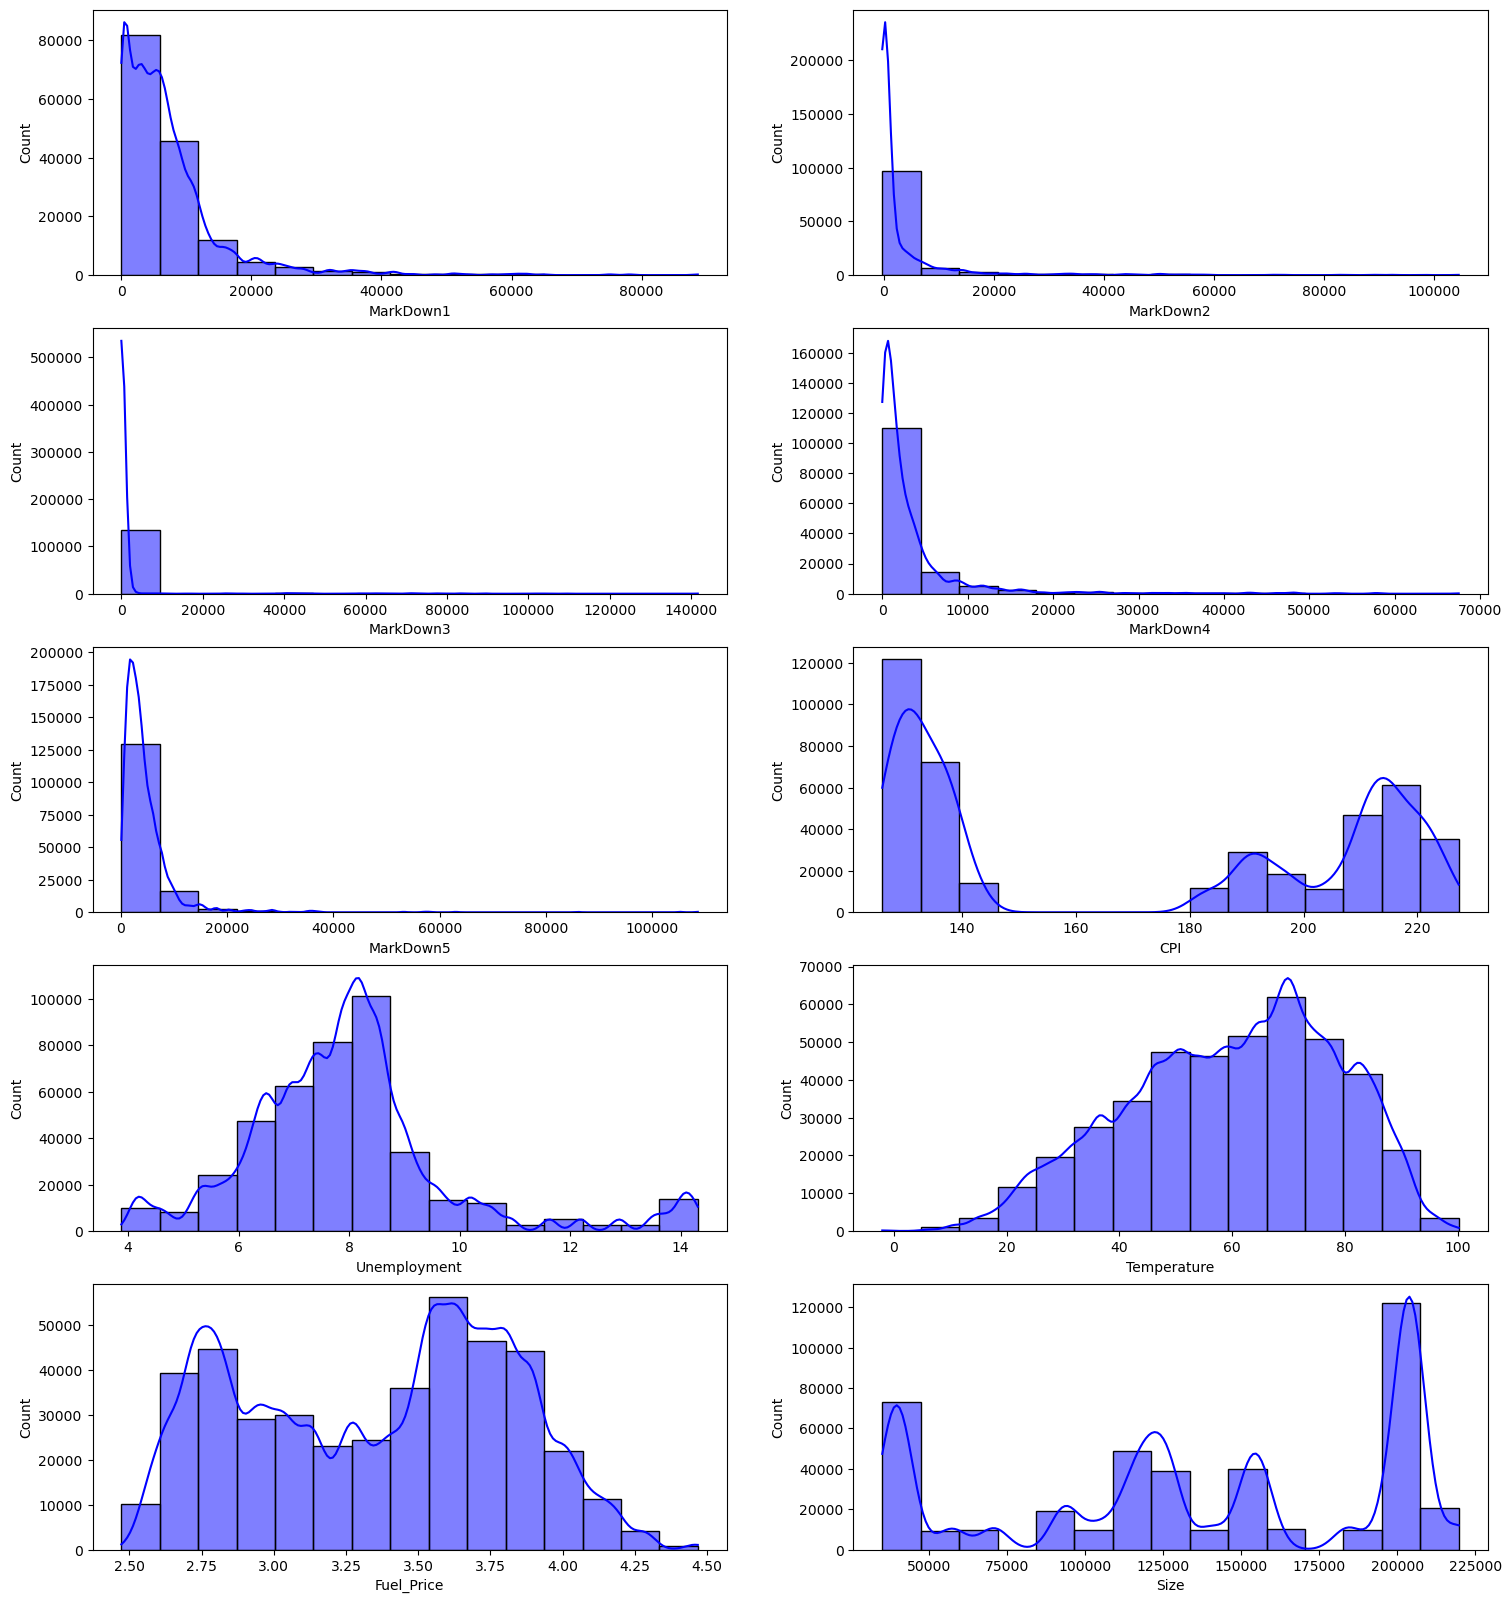

In [11]:
continues = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Temperature","Fuel_Price", "Size"]


plt.figure(figsize=(18,20))
for i, col in enumerate(continues):
    plt.subplot(5,2,i+1)
    sns.histplot(data= sales_df, x = col, kde = True, bins = 15, color = 'b')
plt.show()

Certain features are over-represented at certain values, while certain others are skewed. One notices that MarkDowns are mainly focused at lower values.

We see that columns "Is_Holiday" and "Type" need to be encoded. They are indeed categorical.

In [12]:
# Labeling 

from sklearn.preprocessing import LabelEncoder

sales_df["IsHoliday"] = LabelEncoder().fit_transform(sales_df["IsHoliday"])

sales_df["Type"] = LabelEncoder().fit_transform(sales_df["Type"])

We will have a look at the destribution of some of the categorical data.

C:\Users\GGPC\AppData\Local\Temp\ipykernel_18944\296002757.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i+1)


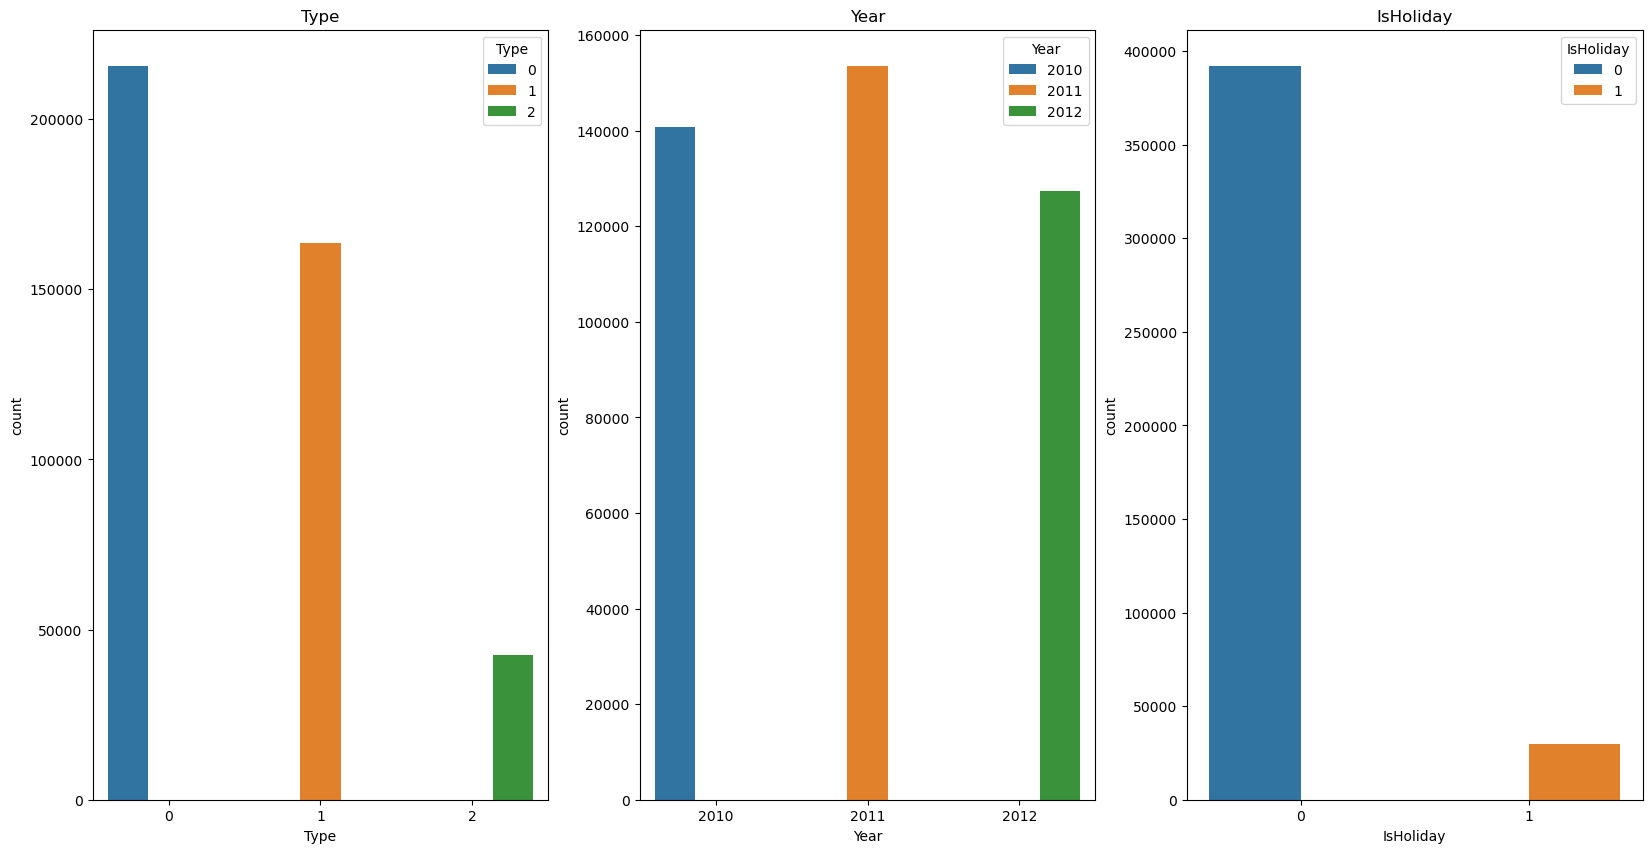

In [13]:
categoricals = ["Type","Year","IsHoliday"]


plt.figure(figsize=(20,10))
plt.title("Counts of categorical data")

for i, col in enumerate(categoricals):
    plt.subplot(1,3,i+1)
    sns.countplot(data= sales_df, x = col, hue=col).set_title(col)
plt.show()

We see that year-wise is more or less distributed nicely. But we can see that stores of type A and B are higher represented. As one expects the number of days which are not holidays completely dominate the days that are holidays.

When do we have holidays? We are going to have a look at the weeks in the year which the holidays occur.

In [14]:
isHoliday_true = sales_df.loc[sales_df["IsHoliday"]==True].groupby(["Week", "Year", "Date"])["Weekly_Sales"].sum().reset_index()

display(isHoliday_true[["Week", "Year", "Date"]])

Week  Year       Date
0     6  2010 2010-02-12
1     6  2011 2011-02-11
2     6  2012 2012-02-10
3    36  2010 2010-09-10
4    36  2011 2011-09-09
5    36  2012 2012-09-07
6    47  2010 2010-11-26
7    47  2011 2011-11-25
8    52  2010 2010-12-31
9    52  2011 2011-12-30

Holidays, occur in weeks 6, 36, 47, and 52. 

## Comparing independent variables with weekly_sales:

In what follows, we will plot several charts to assess the relation between independent variables and weekly sales

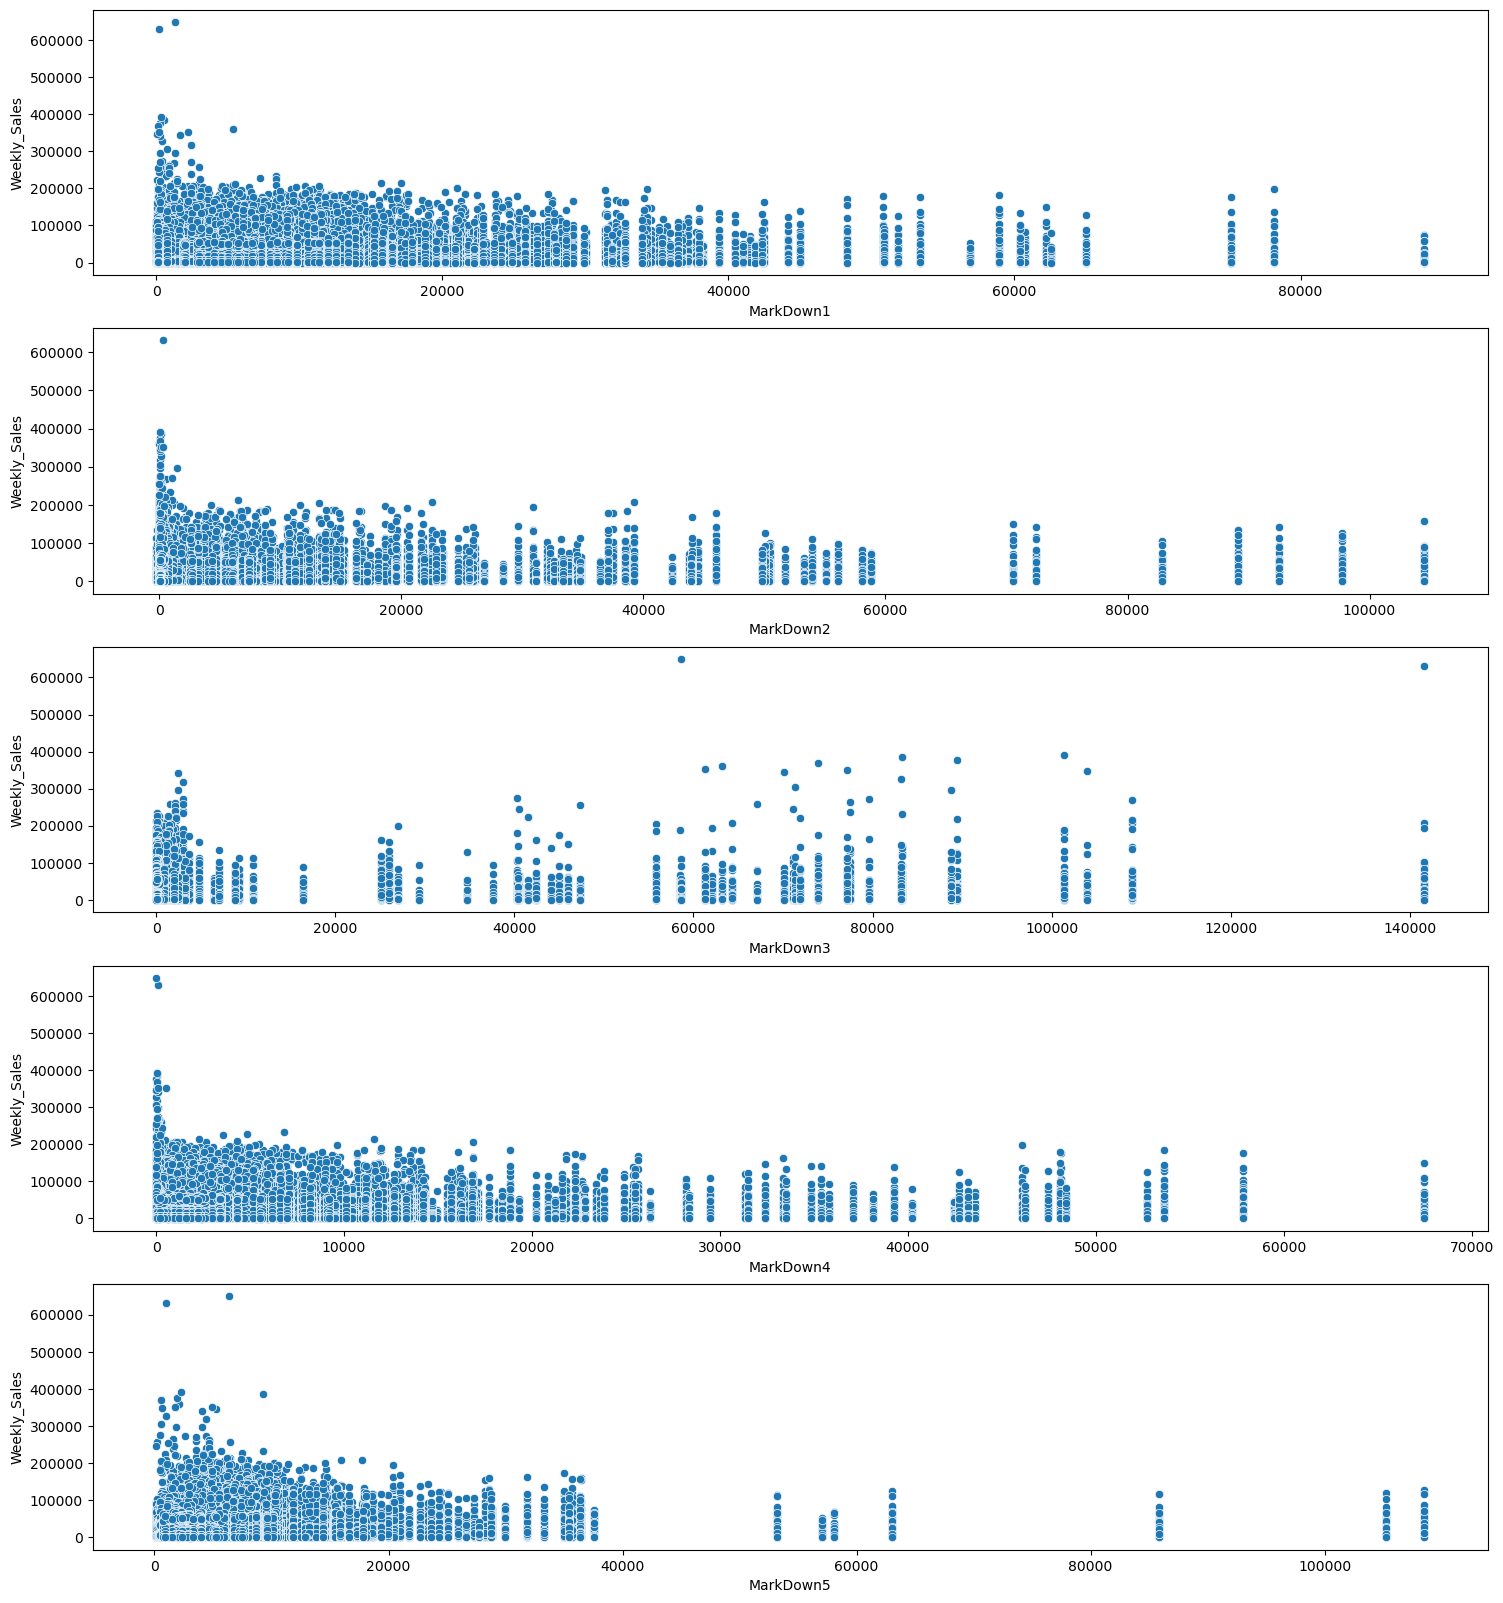

In [15]:
MarkDowns = ["MarkDown1","MarkDown2","MarkDown3", "MarkDown4","MarkDown5"]


plt.figure(figsize=(18,20))
for i, col in enumerate(MarkDowns):
    plt.subplot(5,1,i+1)
    sns.scatterplot(data=sales_df, x=col, y="Weekly_Sales")
plt.show()


It is not completely clear from these plots that mark downs play a major role. We will investigate further later.

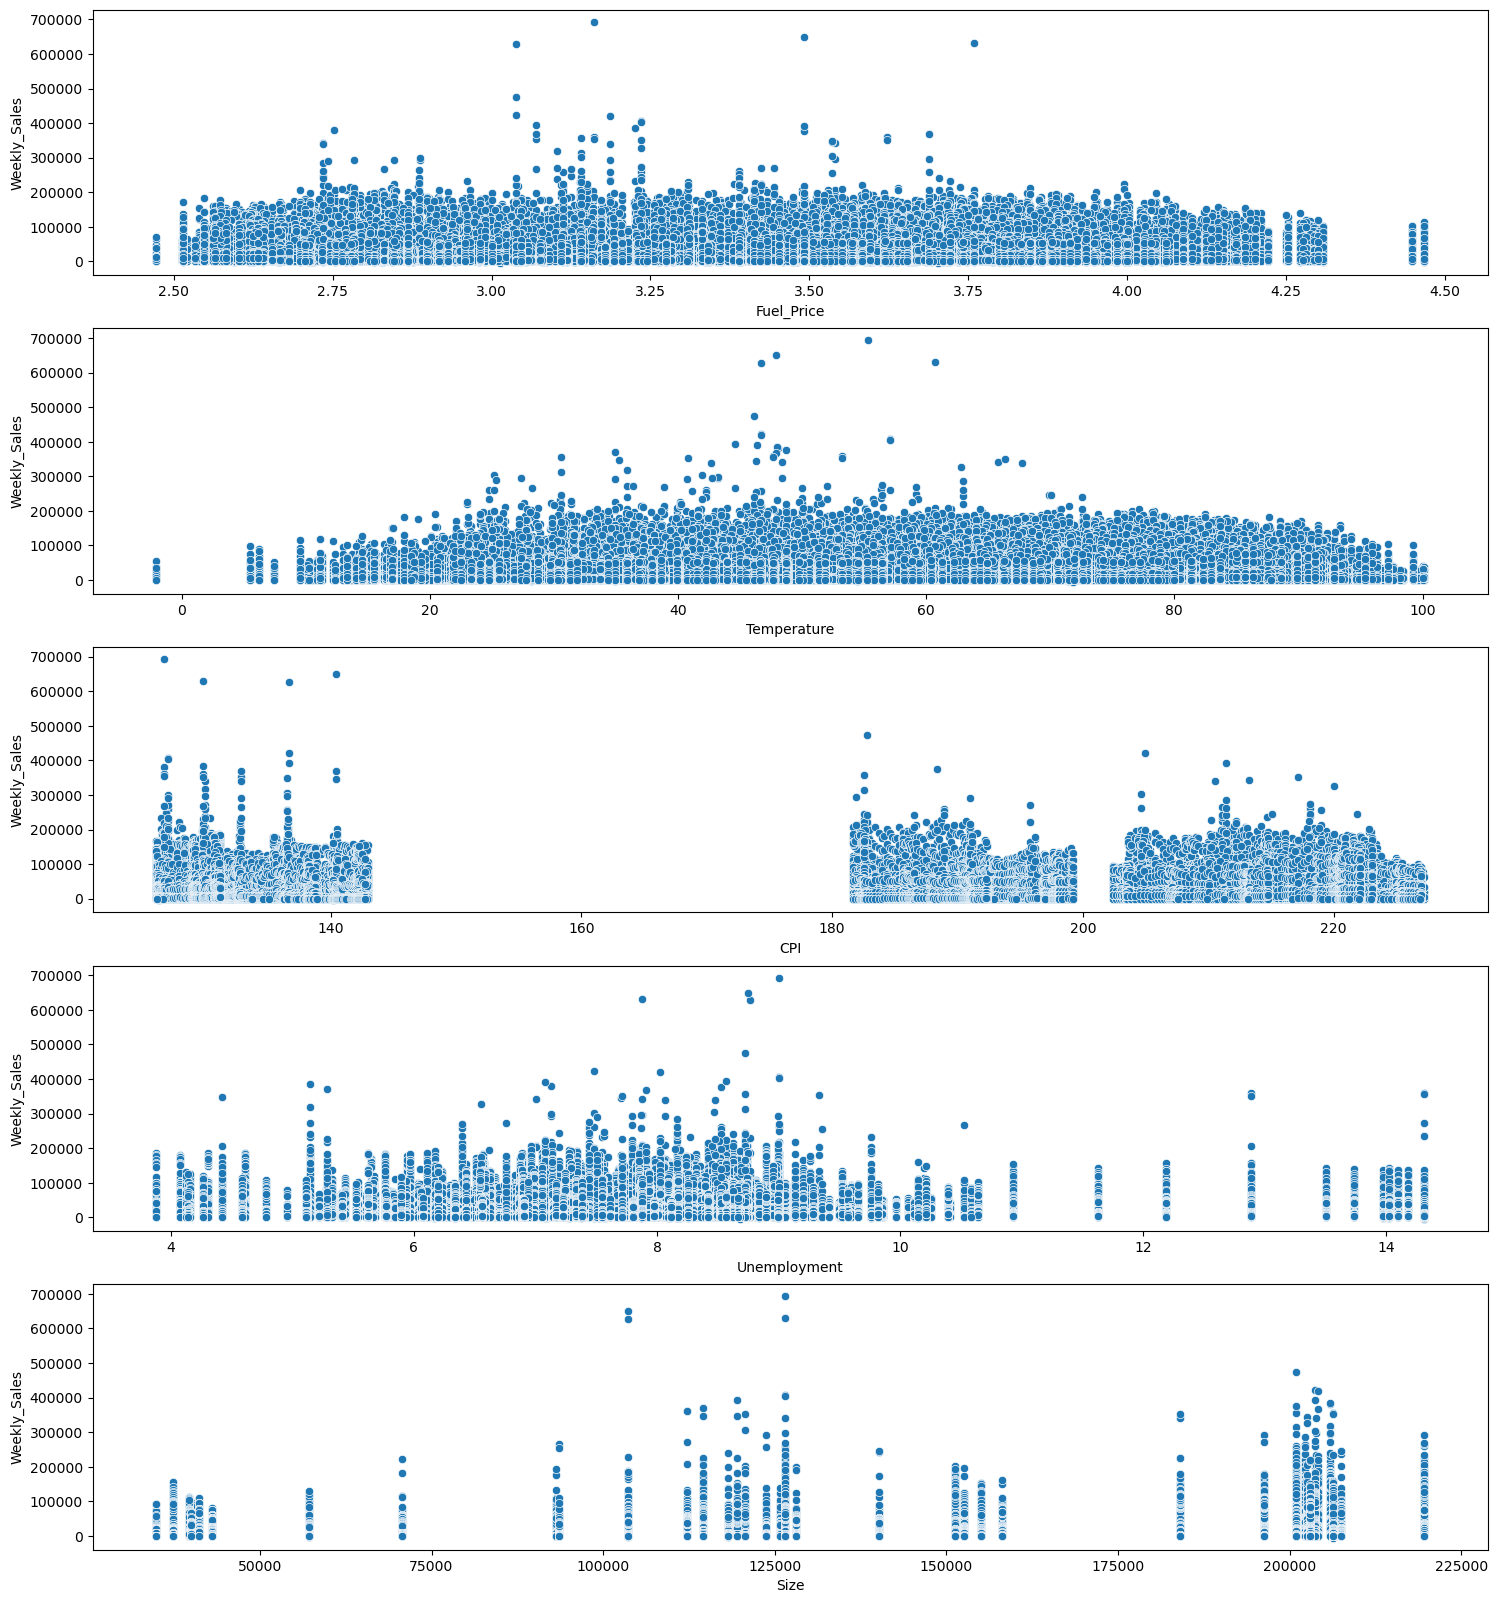

In [16]:
Others = ["Fuel_Price", "Temperature","CPI","Unemployment","Size"]


plt.figure(figsize=(18,20))
for i, col in enumerate(Others):
    plt.subplot(5,1,i+1)
    sns.scatterplot(data=sales_df, x=col, y="Weekly_Sales")
plt.show()

From the above, we can see that generally, the elements do not play a big role in the sale. In the case Size, though, there is generally an increase in the sales.

## Comparing the weekly sales with categorical columns

As there are different counts of some of the categorical columns, instead of plotting each variable vs weekly sales, we will plot the mean. This will give us a better understanding of the role of each variable in consideration.

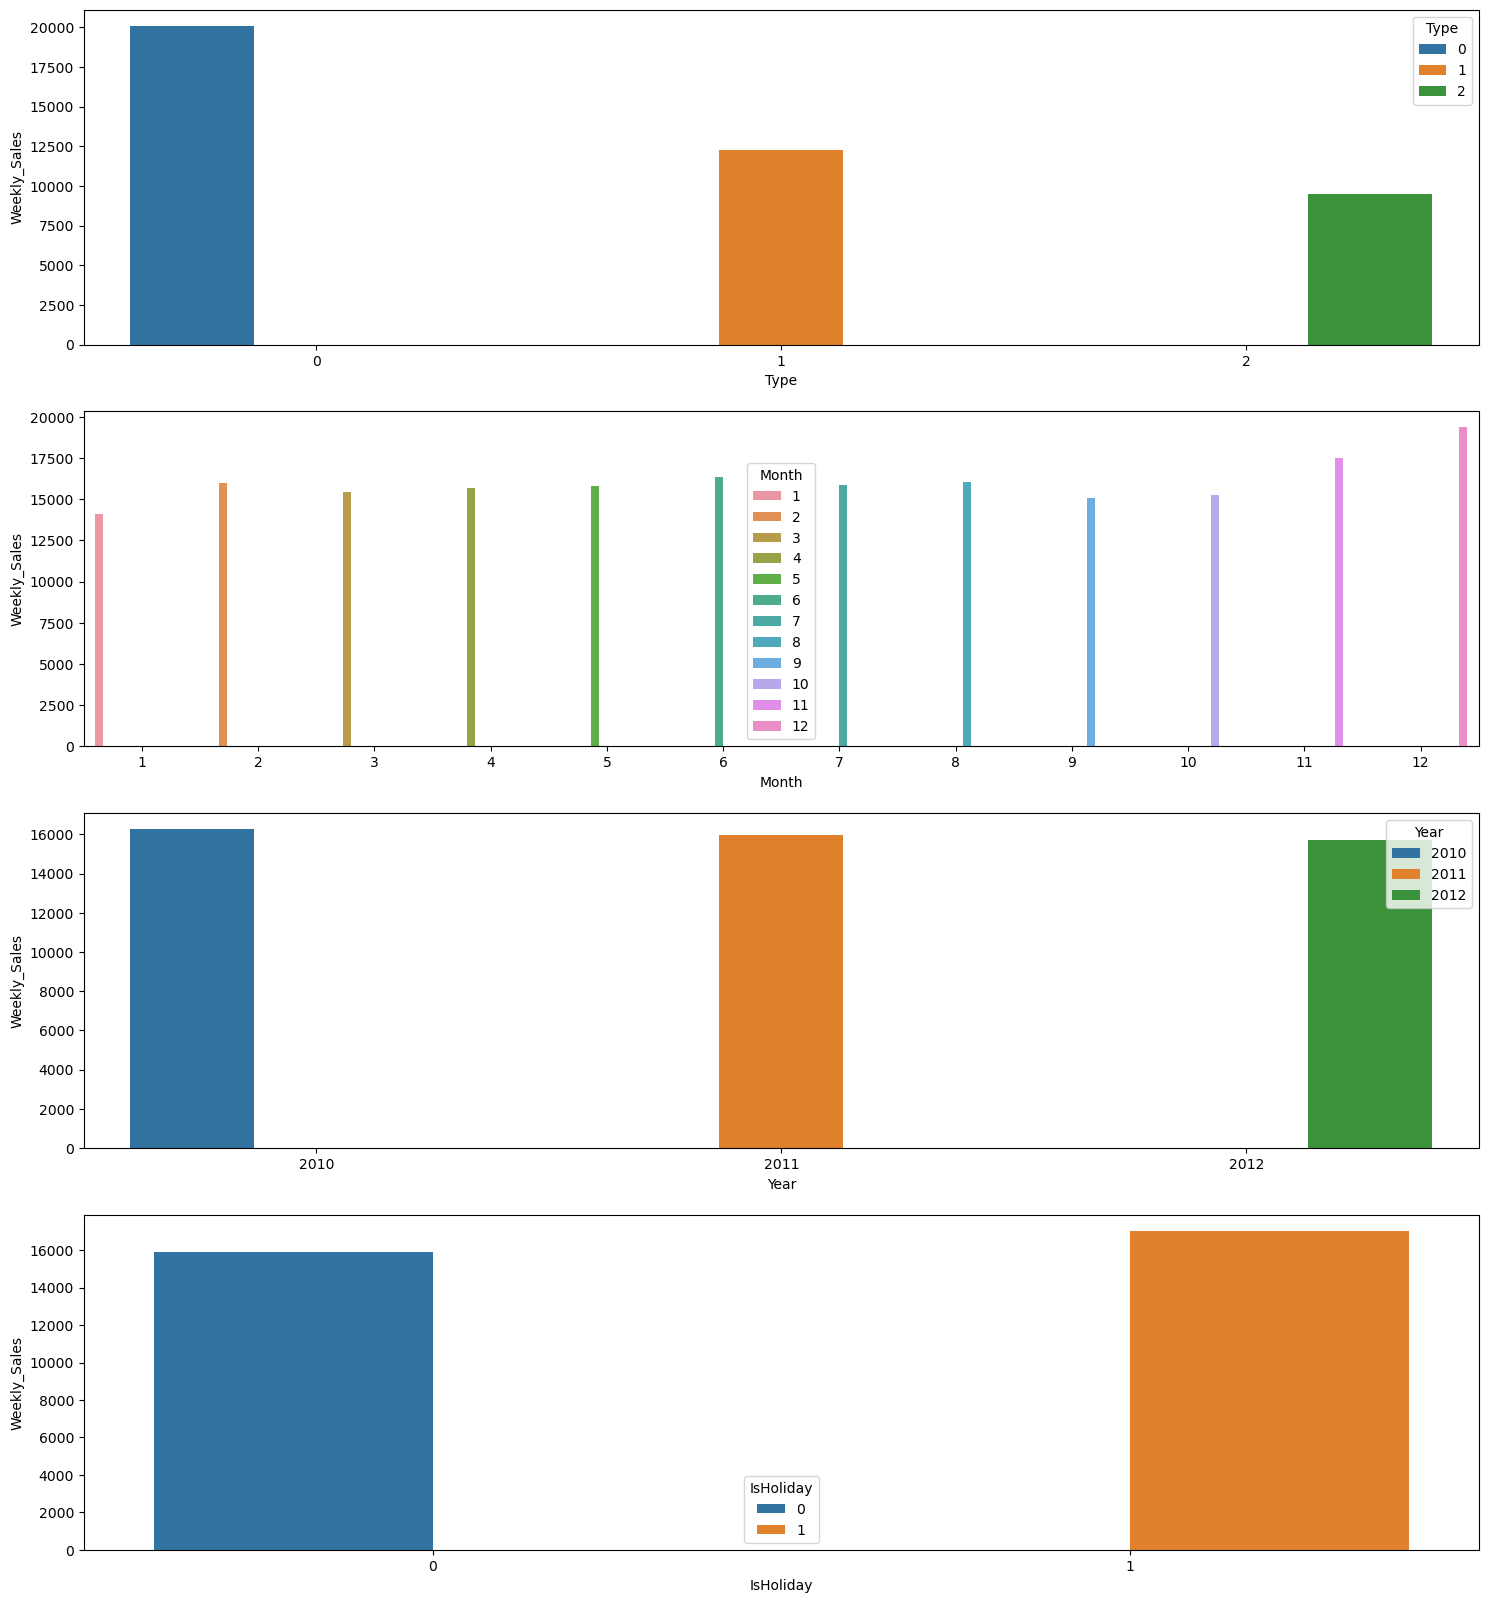

In [17]:
vars_cat = ["Type","Month","Year","IsHoliday"]

plt.figure(figsize=(18,20))
for i, col in enumerate(vars_cat):
    plt.subplot(4,1,i+1)
    sns.barplot(data=sales_df, x=col, y="Weekly_Sales", estimator = np.mean, errorbar =('ci', False), hue=col)
plt.show()

Type is the categorical data which seems to have a great influence on the weekly sales. Regarding the other variables, one might argue against it. To further see this we move to the correlation matrix.

## 4. Identify correlated variables

### Correlation Matrix

We can further use correlation matrix to determine the relation between variables

In [18]:
corr_matrix = sales_df.corr()

fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

corr_matrix['Weekly_Sales'].sort_values(ascending=False)

C:\Users\GGPC\AppData\Local\Temp\ipykernel_18944\8320502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_df.corr()


Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
Month           0.028409
Week            0.027673
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Type           -0.182242
Name: Weekly_Sales, dtype: float64

From above, Size and Dept seem to have a strong positive relation with weekly_sales.

On the other hand, as we saw earlier, the type has a negative relation with weekly sales. Thus, type C leads to lower sales and so one. 

CPI, Temperature, Fuel-Price, and Unemployment show a weak correlation. With this and our analysis above we can drop these columns.

Mark Downs have also show a weak correlation, but still higher than those we drop. However, this may be due to having a majority of missing values therefore we wont drop these columns and will deal with the missing values.


### Handling missing values

Let us have another look at the missing values.

In [19]:
sales_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Week                 0
Month                0
Year                 0
dtype: int64

We did not see a clear indication that mark downs play a role. We can take different paths here. The one that I choose is simply droping them, as I could not see a clear relations between mark downs and weekly sales.

In [20]:
# Making a copy of the original data set.

df_copy1 = sales_df.copy()

In [21]:
df_copy1 = df_copy1.dropna()

In [22]:
df_copy1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Month           0
Year            0
dtype: int64

One more look at the correlations after getting rid of the NaN.

In [23]:
corr_matrix = df_copy1.corr()

corr_matrix['Weekly_Sales'].sort_values(ascending=False)

C:\Users\GGPC\AppData\Local\Temp\ipykernel_18944\614847594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy1.corr()


Weekly_Sales    1.000000
Size            0.212192
Dept            0.137125
MarkDown3       0.062792
MarkDown5       0.059649
Month           0.050833
Week            0.050354
MarkDown1       0.037341
MarkDown4       0.029471
MarkDown2       0.015829
IsHoliday       0.014389
Temperature     0.013029
CPI            -0.016371
Fuel_Price     -0.020557
Unemployment   -0.037735
Store          -0.053834
Year           -0.057498
Type           -0.174546
Name: Weekly_Sales, dtype: float64

We still observe a higher correlation between weekly sales and markdown in comparsion with the columns we are dropping. Therefore, we will keep them in for model training.

### Handling the outliers

Plotting the box plots in order to observe the outliers.

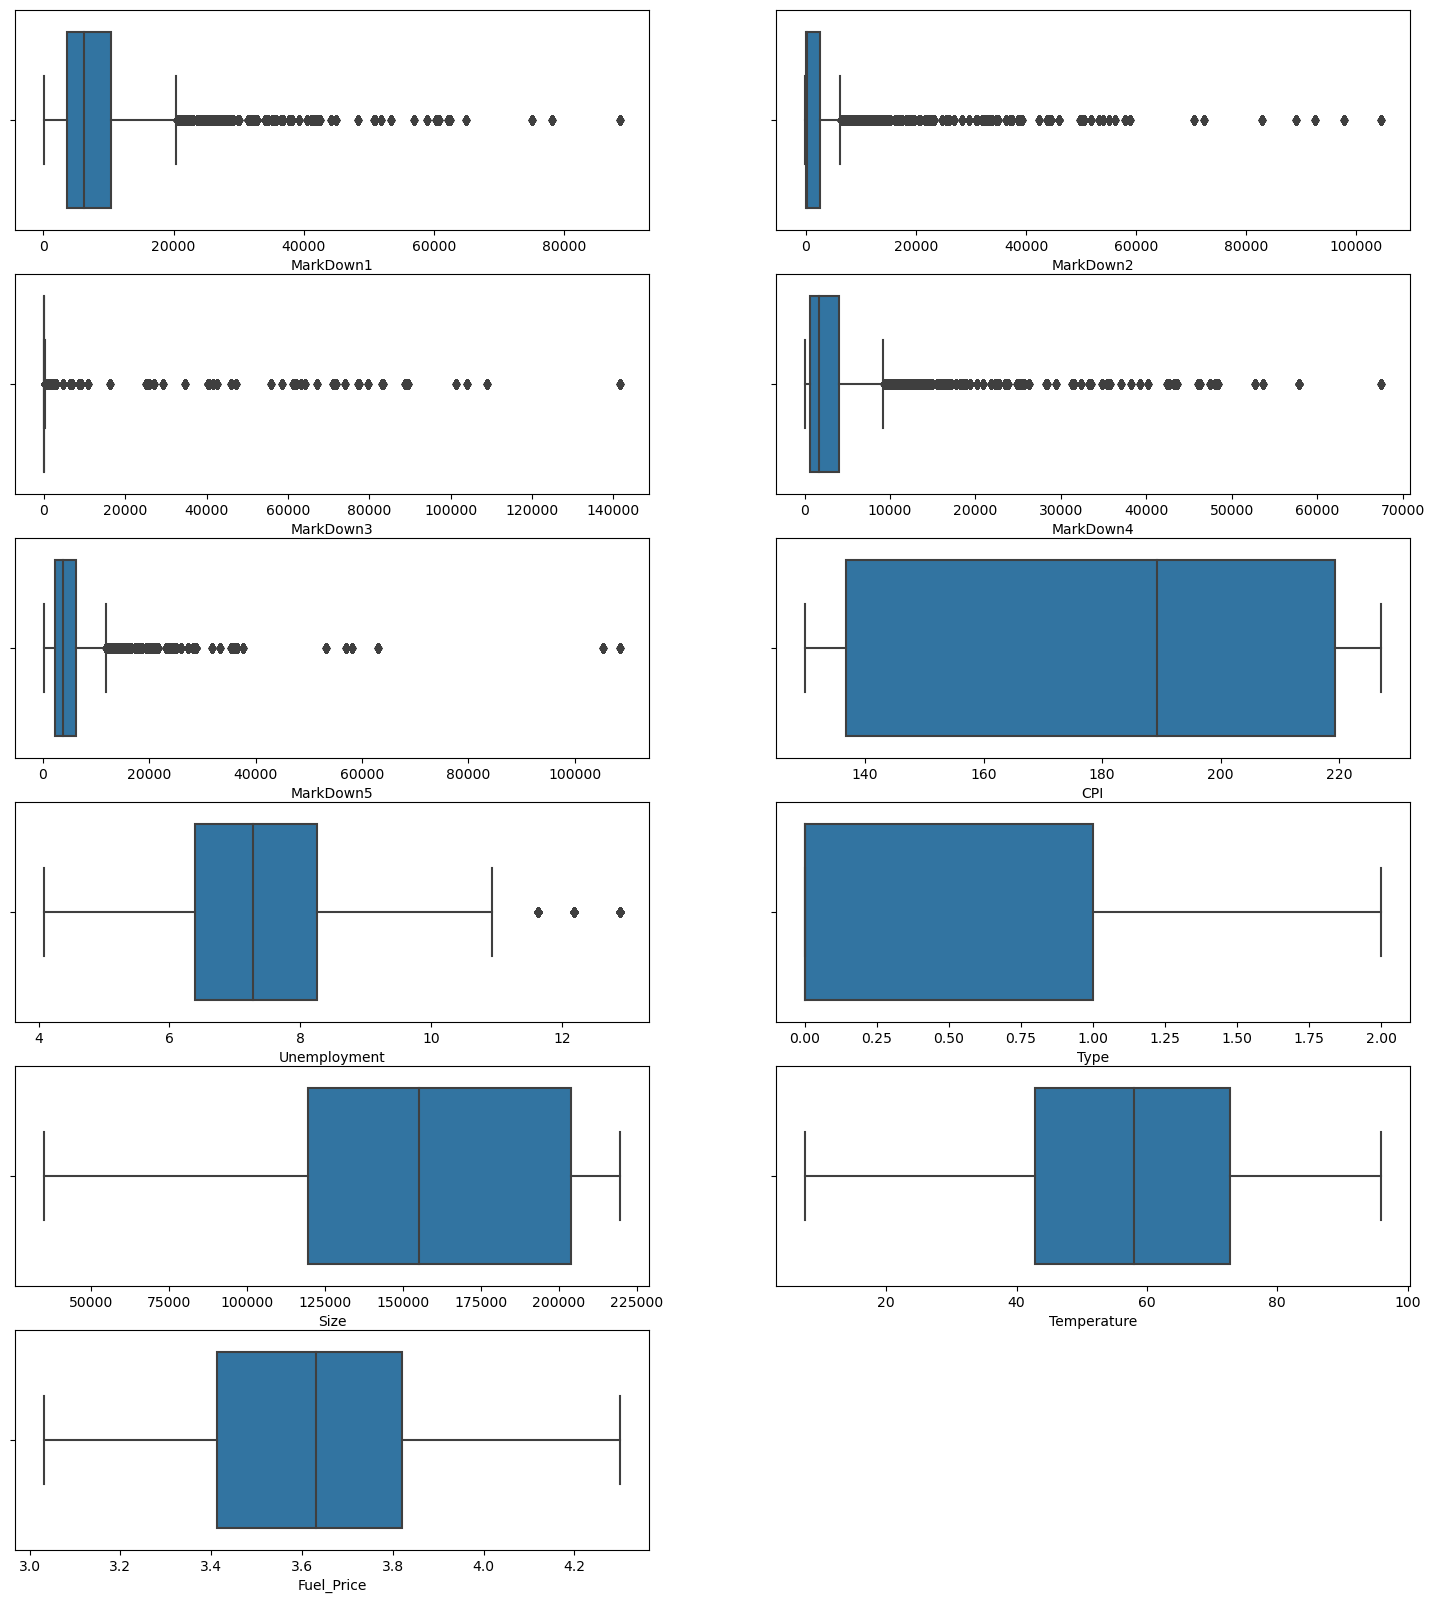

In [24]:
Outliers = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Type","Size","Temperature", "Fuel_Price"]


plt.figure(figsize=(18,20))
for i, col in enumerate(Outliers):
    plt.subplot(6,2,i+1)
    sns.boxplot(data= df_copy1, x = col)
plt.show()

There are considerable amount of outliers in markdowns. We will get rid of them. We will get rid of the bottom 5 percent and the top five percent.

In [25]:
for element in MarkDowns:
    q1 = df_copy1[element].quantile(0.05)
    q3 = df_copy1[element].quantile(0.95)
    iqr = q3 - q1

    df_copy1 = df_copy1[df_copy1[element] <= (q3 + 1.5 * iqr)]
    df_copy1 = df_copy1[df_copy1[element] >= (q1 - 1.5 * iqr)]

    df_copy1 = df_copy1.reset_index(drop=True) 

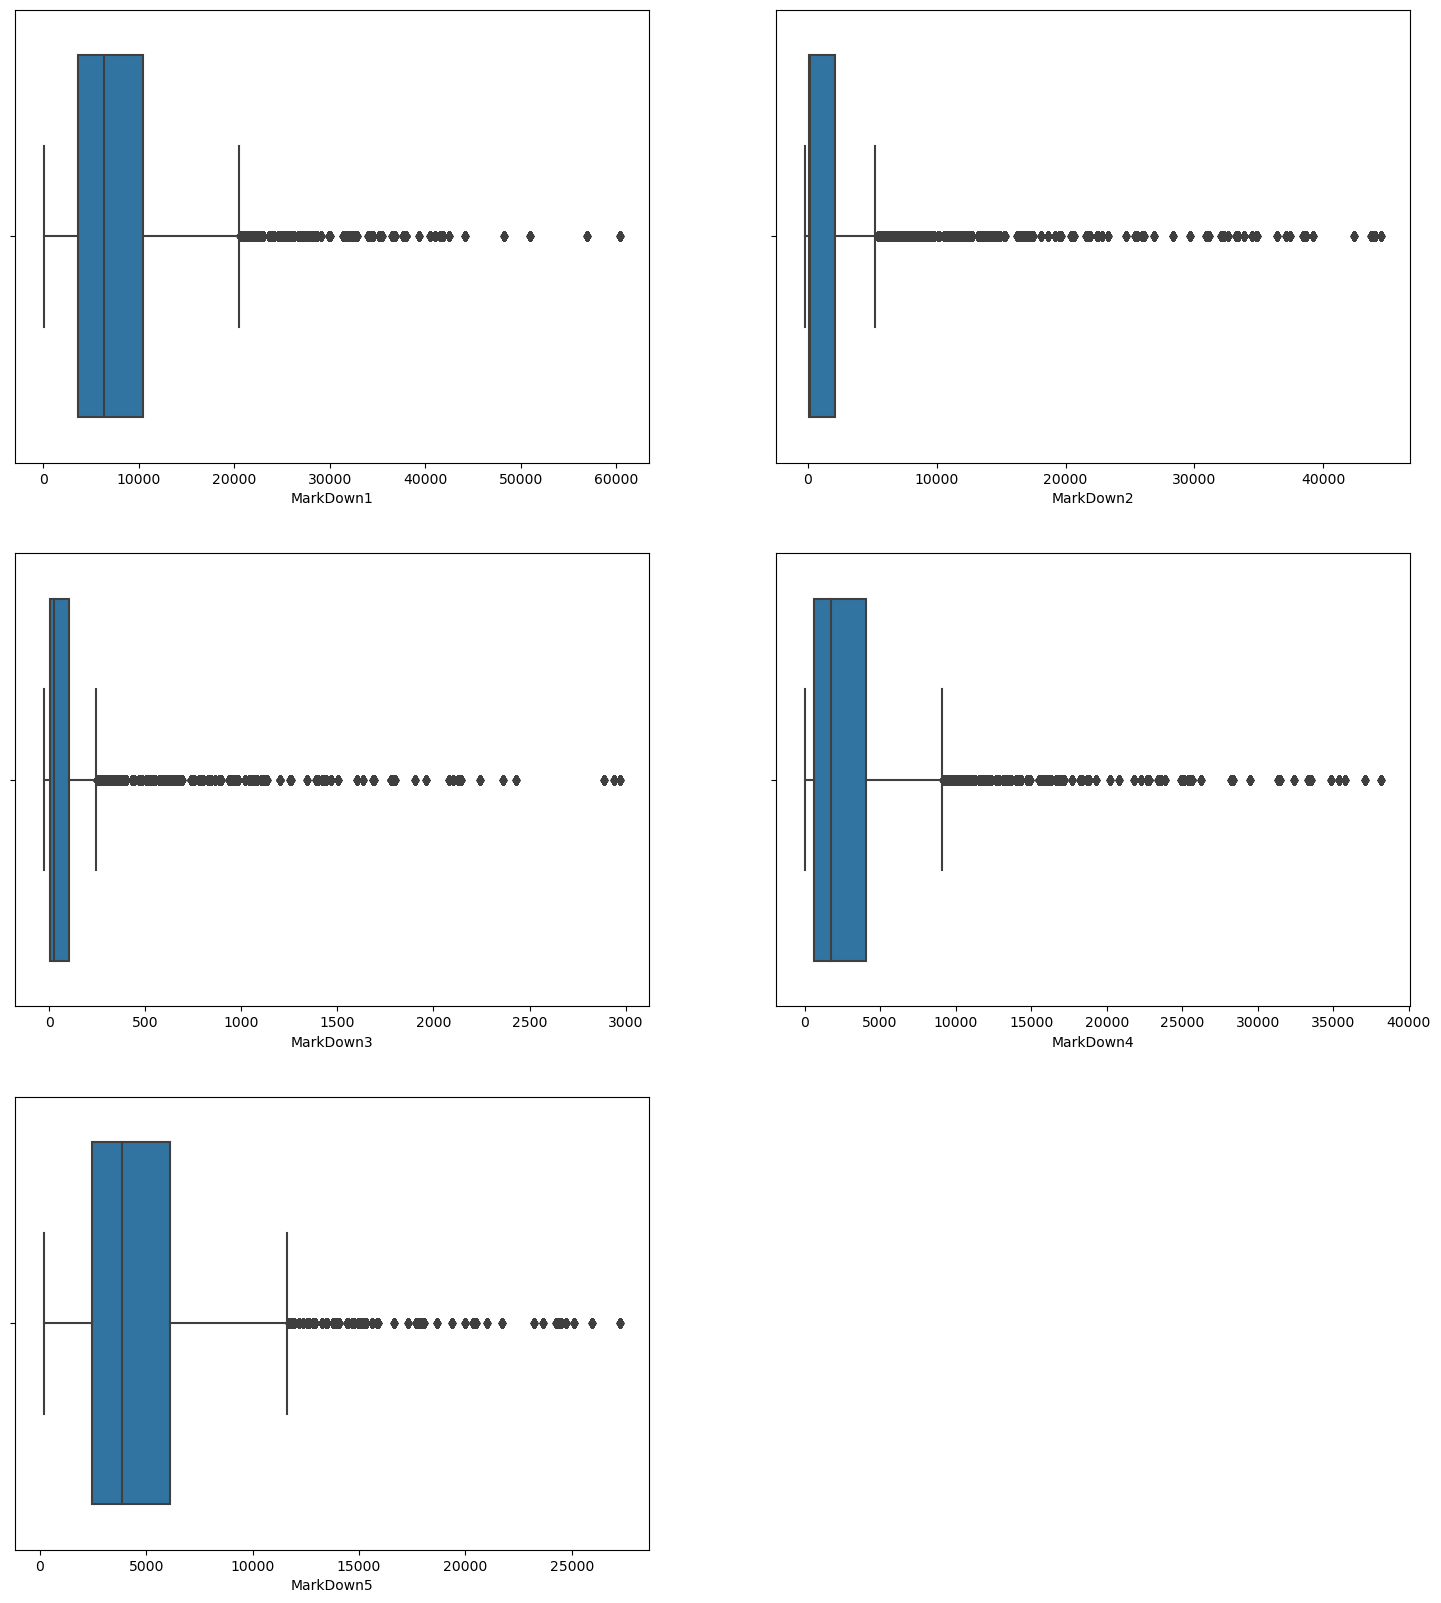

In [26]:
plt.figure(figsize=(18,20))
for i, col in enumerate(MarkDowns):
    plt.subplot(3,2,i+1)
    sns.boxplot(data= df_copy1, x = col)
plt.show()

In [27]:
df_copy1.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2011-11-11      18689.54          0        59.11       3.297   
1      1     1 2011-11-18      19050.66          0        62.25       3.308   
2      1     1 2011-12-02      25293.49          0        48.91       3.172   
3      1     1 2011-12-09      33305.92          0        43.93       3.158   
4      1     1 2011-12-16      45773.03          0        51.63       3.159   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0   10382.90    6115.67     215.07    2406.62    6551.42  217.998085   
1    6074.12     254.39      51.98     427.39    5988.57  218.220509   
2    5629.51      68.00    1398.11    2084.64   20475.32  218.714733   
3    4640.65      19.00     105.02    3639.42   14461.82  218.961846   
4    5011.32      67.00     347.37     225.79    4011.37  219.179453   

   Unemployment  Type    Size  Week  Month  Year  
0         7.866     0  151315    45     11  2011  
1         7.866     0  151315    46     11  2011  
2         7.866     0  151315    48     12  2011  
3         7.866     0  151315    49     12  2011  
4         7.866     0  151315    50     12  2011

In [28]:
df_copy1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Month',
       'Year'],
      dtype='object')

From the above, we noticed that certain columns do not seem to attributing to the weekly_sales. We get rid of them.

# Save dataframe to csv

In [29]:
from pathlib import Path

filepath = Path('./outputdataframes/processsalesdataframe.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_copy1.to_csv(filepath)

## 5. Summary

In the above, we created a large dataframe and we analyzed it for further modeling in the next section. I used several different techniques, to recognize the correlations between variables. I achieved this using different plotting techniques and correlation matrix. I further, dealt with missing data and those categorical data that need to be encoded. I further, recognized the outliers and dealt with them accordingly. Due to the nature of the data available to us, I eliminated the missing data I encountered. Finally, I standardize my data. This gave me a clean list of independent variables and an dependent variable that I could use for analyzing in the next section. 